![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 02: Keras API cted
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Advanced Data Analysis (28-03-2020)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-advanced-data-analysis-2020/blob/master/S02_TF_intro/02_Advanced_Data_Analysis_Keras_API_cted_NOTsolved.ipynb)

**Resources (code patched and updated from):**
* Sklearn
* TensorFlow Authors
* Aurelien Geron's O'Reilly's "Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Import Keras from TensorFlow
from tensorflow import keras

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# A paradigm change

UUID - #S2C1

Source: The TensorFlow Authors (Laurence Moroney)

Like every first app you should start with something super simple that shows the overall scaffolding for how your code works. 

In the case of creating neural networks, the sample I like to use is one where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules' — 


```
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

So how would you train a neural network to do the equivalent task? Using data! By feeding it with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them. 

This is obviously a very different paradigm than what you might be used to, so let's step through it piece by piece.


## Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a loss and an optimizer.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is y=2x-1. 

When the computer is trying to 'learn' that, it makes a guess...maybe y=10x+10. The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like y=5x+5, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of EPOCHS which you will see shortly. But first, here's how we tell it to use 'MEAN SQUARED ERROR' for the loss and 'STOCHASTIC GRADIENT DESCENT' for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios. 


In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that y=2x-1, so where x = -1, y=-3 etc. etc. 

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an np.array[]

In [0]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the **model.fit**  call. This is where it will go through the loop we spoke about above, making a guess, measuring how good or bad it is (aka the loss), using the opimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [0]:
model.fit(xs, ys, epochs=500)

Ok, now you have a model that has been trained to learn the relationshop between X and Y. You can use the **model.predict** method to have it figure out the Y for a previously unknown X. So, for example, if X = 10, what do you think Y will be? Take a guess before you run this code:

In [0]:
print(model.predict([10.0]))

You might have thought 19, right? But it ended up being a little under. Why do you think that is? 

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y=2X-1, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19. 

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.


## In class exercise: understanding neural nets

UUID - #S2E1

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [0]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    xs = #your code here
    ys = #your code here
    model = #your code here
    model.compile(optimizer='sgd', loss='mean_squared_error')
    model.fit(#your code here)
    return model.predict(y_new)[0]

In [0]:
prediction = house_model([7.0])
print(prediction)

# Building an MLP Regressor

UUID - #S2C2

Let's load, split and scale the California housing dataset

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6415 - val_loss: 0.8557
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6528
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6097
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5980 - val_loss: 0.5656
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5707 - val_loss: 0.5353
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5473 - val_loss: 0.5171
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5079
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.4798
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4990 - val_loss: 0.4688
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4655

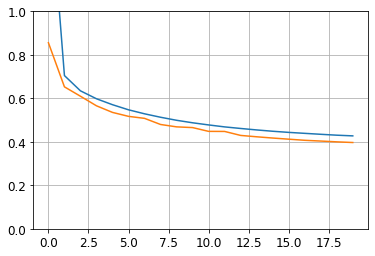

In [0]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [0]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

# The Functional API

UUID - #S2C3

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

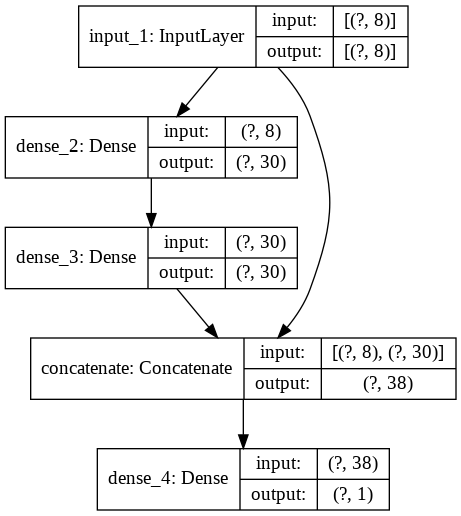

In [0]:
keras.utils.plot_model(model, "my_nonseq_model.png", show_shapes=True)

In [0]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2608 - val_loss: 3.3923
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9356
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5647
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5585 - val_loss: 0.5710
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5349 - val_loss: 0.5043
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5158 - val_loss: 0.4830
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5003 - val_loss: 0.4638
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4876 - val_loss: 0.4636
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4759 - val_loss: 0.4420
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.4311

## Multiple Inputs

UUID - #S2C4

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

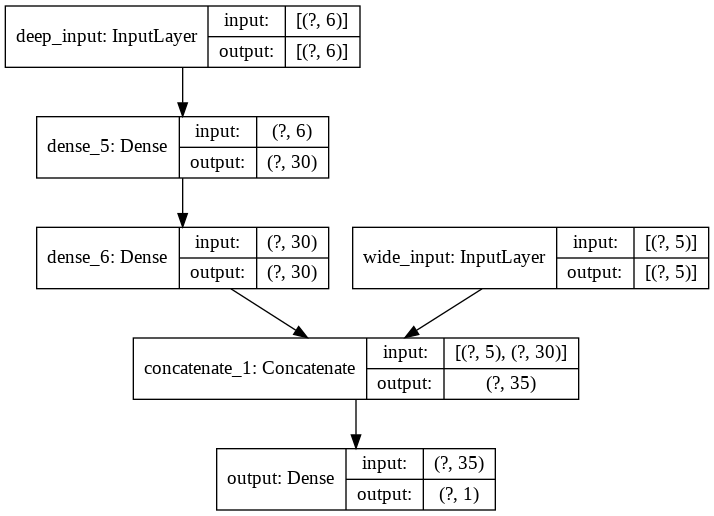

In [0]:
keras.utils.plot_model(model, "my_multipleinput_model.png", show_shapes=True)

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8140 - val_loss: 0.8070
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6771 - val_loss: 0.6656
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5978 - val_loss: 0.5686
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5587 - val_loss: 0.5295
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5336 - val_loss: 0.4991
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5121 - val_loss: 0.4809
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4971 - val_loss: 0.4694
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4843 - val_loss: 0.4494
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4729 - val_loss: 0.4403
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4644 - val_loss: 0.4314

## Multiple outputs for regularization

UUID -#S2C5

Adding an auxiliary output for regularization:

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [0]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0979 - main_output_loss: 1.8516 - aux_output_loss: 4.3146 - val_loss: 1.5426 - val_main_output_loss: 0.9142 - val_aux_output_loss: 7.1981
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9781 - main_output_loss: 0.7778 - aux_output_loss: 2.7808 - val_loss: 1.3113 - val_main_output_loss: 0.6823 - val_aux_output_loss: 6.9728
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8064 - main_output_loss: 0.6684 - aux_output_loss: 2.0487 - val_loss: 1.2618 - val_main_output_loss: 0.6457 - val_aux_output_loss: 6.8068
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7201 - main_output_loss: 0.6118 - aux_output_loss: 1.6954 - val_loss: 1.2018 - val_main_output_loss: 0.6134 - val_aux_output_loss: 6.4974
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6702 - main_output_loss: 0.5758 - aux_output_loss: 1.5196 - val_loss

In [0]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 974us/step - loss: 0.4825 - main_output_loss: 0.4276 - aux_output_loss: 0.9765


In [0]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

[[0.32896826]
 [1.8843658 ]
 [3.3908076 ]] [[1.314269 ]
 [1.9748342]
 [2.62874  ]]


# Saving and Restoring

UUID - #S2C6

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8861 - val_loss: 0.7125
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6878
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5802
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5560 - val_loss: 0.5165
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4894
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4949
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4860
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4552
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4577 - val_loss: 0.4412
Epoch 10/10
162/162 [==============================] - 0s 825us/step - loss: 0.4376


In [0]:
model.save("my_keras_model.h5")

In [0]:
model = keras.models.load_model("my_keras_model.h5")

In [0]:
model.predict(X_new)

array([[0.5400236],
       [1.650597 ],
       [3.009824 ]], dtype=float32)

In [0]:
model.save_weights("my_keras_weights.ckpt")

In [0]:
model.load_weights("my_keras_weights.ckpt")

## In class exercise: sharing your model

UUID - #S2E2

Train the housing dataset with multi input features:



*   8 passing throught the deep part
*   3 passing through the wide part

Predict over some new dataset. 

Once the model is finished, you will be asked to share the model with a colleague in the form of a h5 file. Your colleague should get about the same predictions over the same new dataset.



# Using Callbacks during Training

UUID - #S2C8

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8861 - val_loss: 0.7125
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6878
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5802
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5560 - val_loss: 0.5165
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4894
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4949
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4860
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4552
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4577 - val_loss: 0.4412
Epoch 10/10
162/162 [==============================] - 0s 919us/step - loss: 0.4376


In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4394 - val_loss: 0.4108
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4315 - val_loss: 0.4265
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4259 - val_loss: 0.3995
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4202 - val_loss: 0.3938
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4155 - val_loss: 0.3888
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4112 - val_loss: 0.3865
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4074 - val_loss: 0.3859
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3792
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4006 - val_loss: 0.3745
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3976 - val_lo

In [0]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [0]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

337/363 [==========================>...] - ETA: 0s - loss: 0.3290
val/train: 1.08
363/363 [==============================] - 1s 1ms/step - loss: 0.3303 - val_loss: 0.3560


# Hyperparameter Tuning

UUID - #S2C9

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0894 - val_loss: 20.7615
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7605 - val_loss: 5.0241
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5488
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.4527
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4504 - val_loss: 0.4187
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4128
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4242 - val_loss: 0.4003
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4168 - val_loss: 0.3942
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4107 - val_loss: 0.3960
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4061 - val_l

In [0]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 833us/step - loss: 0.3335


In [0]:
y_pred = keras_reg.predict(X_new)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon.

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2],
    "n_neurons": np.arange(1, 50),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.00037192261022352417, n_hidden=2, n_neurons=47 ..
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 2ms/step - loss: 3.6671 - val_loss: 2.9353
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.7978 - val_loss: 2.1152
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1464 - val_loss: 1.5584
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8871 - val_loss: 1.0674
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7715 - val_loss: 0.7901
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7138 - val_loss: 0.6936
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6816 - val_loss: 0.6321
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6604 - val_loss: 0.6070
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6453 - val_loss: 0.5917
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6322 - val_loss: 0.5789
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.3s remaining:    0.0s


242/242 [==============================] - 0s 2ms/step - loss: 3.8241 - val_loss: 4.9566
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5946 - val_loss: 9.0648
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0572 - val_loss: 9.6631
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8935 - val_loss: 8.4994
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8157 - val_loss: 7.0606
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7702 - val_loss: 5.8696
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7402 - val_loss: 4.8773
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7178 - val_loss: 4.0528
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6999 - val_loss: 3.4236
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6843 - val_loss: 2.9124
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.4min finished


RuntimeError: ignored

In [0]:
rnd_search_cv.best_params_

{'learning_rate': 0.008339092654580042, 'n_hidden': 1, 'n_neurons': 38}

In [0]:
rnd_search_cv.best_score_

-0.35238636533419293

In [0]:
rnd_search_cv.best_estimator_

AttributeError: ignored

In [0]:
rnd_search_cv.score(X_test, y_test)

AttributeError: ignored

In [0]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: ignored

In [0]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 878us/step - loss: 0.3295


0.32945728302001953

# EXERCISE 1: using the NN power in MNIST [In class and home exercise]

UUID - #S2E3

I know, I know... you are tired of it... but it is a good standard dataset to play with hyperparameters. We will help the community with COVID19 later on when we know how to do simple NNs.

Try to train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`). See if you can get over 98% precision. 

Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). 

Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard. 

Also, try hyperparameter tuning (without RandomSearchCV... it is broken at the moment...)

**You will need to bring me an h5 file that I will run to check the accuracy and a screenshot of TensorBoard**

Let's load the dataset:

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# EXERCISE 2: keep on going with Covid19

Try to apply what you learned to the Xray dataset 

*   Option 1: try to apply what you learned to the Xray dataset presented in last session. This will be a compound exercise across many sessions. It will be graded when we present how to create a CNN in Session 3-4 
*   Option 2: build an MLP regressor to predict the spread of coronavirus in [this Kaggle dataset](https://www.kaggle.com/c/covid19-global-forecasting-week-1), use all the artillery learned today

Do both for extra points.